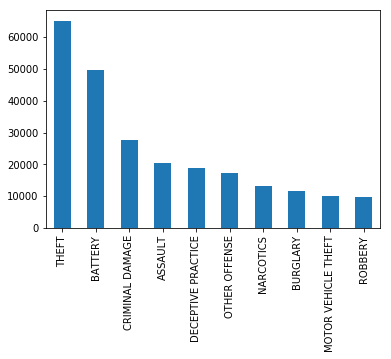

In [58]:
#1.Plot the Chart – Top 10 crimes recorded. 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

crimes=pd.read_csv('C:/Users/Administrator/Desktop/EDA/Crimes_2018_Modified.csv')
housing=pd.read_csv('C:/Users/Administrator/Desktop/EDA/Housing_Modified.csv')

top_10_crimes=crimes['Primary_Type'].value_counts().sort_values(ascending=False).head(10)
top_10_crimes.plot(kind='bar')

In [14]:
#2.How many times Police made arrests on Domestic Crimes?
crimes[(crimes['Domestic']==True) & (crimes['Arrest']==True)]['Domestic'].count()

7564

In [35]:
#3.Mention 5 safest communities to live according to data.

merge_com_crime=pd.merge(crimes,housing,left_on='Community_Area_Number',right_on='Community_Area_Number')
merge_com_crime.groupby(['Community_Area_Name'])['Primary_Type'].count().sort_values().head(5)

Community_Area_Name
Hegewisch          622
Fuller Park        837
West Elsdon       1014
Jefferson Park    1098
Avalon Park       1162
Name: Primary_Type, dtype: int64

In [38]:
#4.How many times police made arrests when crime happened on streets?
crimes[(crimes['Location_Description']=='STREET') & (crimes['Arrest']==True)]['Location_Description'].count()

12527

In [39]:
#5.Find total no. of cases recorded in 2018.
crimes[crimes['Year']==2018]['Case Number'].count() #or len(crimes['Case Number'].unique())

266893

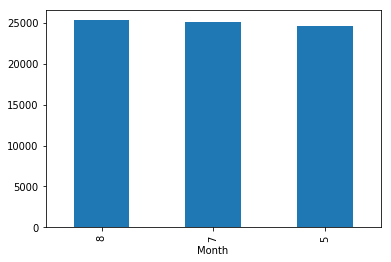

In [62]:
#6.Analyse month wise crimes and plot the same, also determine in which 3 months crime rate is high.
import datetime  

crimes['Month']=pd.DatetimeIndex(crimes['Date']).month #extracting month only

crimes['Month'].head()

crimes.groupby('Month')['Primary_Type'].count().sort_values(ascending=False).head(3).plot('bar')

AxesSubplot(0.125,0.125;0.775x0.755)


Day
1     10378
20     9182
27     8954
2      8922
28     8918
Name: Primary_Type, dtype: int64

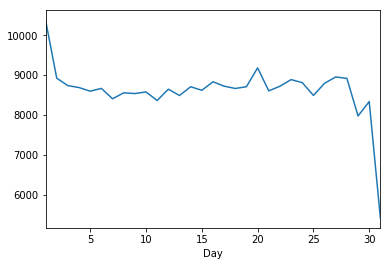

In [66]:
#7.Analyse day wise crimes and line plot the same, also determine in which 5 days crime rate is high 
crimes['Day']=pd.DatetimeIndex(crimes['Date']).day
no_of_crimes=crimes.groupby('Day')['Primary_Type'].count()
print(no_of_crimes.plot('line'))
five_days_rate=no_of_crimes.sort_values(ascending=False).head(5)
five_days_rate

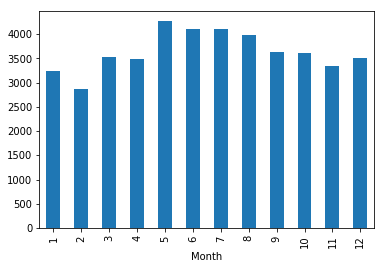

In [68]:
#8.Analyse Monthly Domestic Violence
crimes[crimes['Domestic']==True].groupby('Month')['ID'].count().plot('bar')

In [69]:
#9.Find 5 safest districts and 5 dangerous districts to live.
safest_5_districts=crimes.groupby('District')['Primary_Type'].count().sort_values().head(5)
dangerous_5_districts=crimes.groupby('District')['Primary_Type'].count().sort_values(ascending=False).head(5)
print(safest_5_districts)
dangerous_5_districts

District
31       6
20    4927
17    7612
24    7675
22    8417
Name: Primary_Type, dtype: int64


District
11    19072
6     16447
8     16330
18    16166
1     15641
Name: Primary_Type, dtype: int64

In [75]:
#10.What are the most happening crimes in the month of Christmas?
crimes[crimes['Month']==12]['Primary_Type'].value_counts().sort_values(ascending=False).head(5)

THEFT                 5671
BATTERY               3854
CRIMINAL DAMAGE       2245
ASSAULT               1590
DECEPTIVE PRACTICE    1587
Name: Primary_Type, dtype: int64

In [76]:
#11.Find no of Kidnap crimes happened on Streets, Side Walk.
crimes[(crimes['Location_Description'].isin(['STREET','SIDEWALK'])) & (crimes['Primary_Type']=='KIDNAPPING')]['Primary_Type'].count()

74